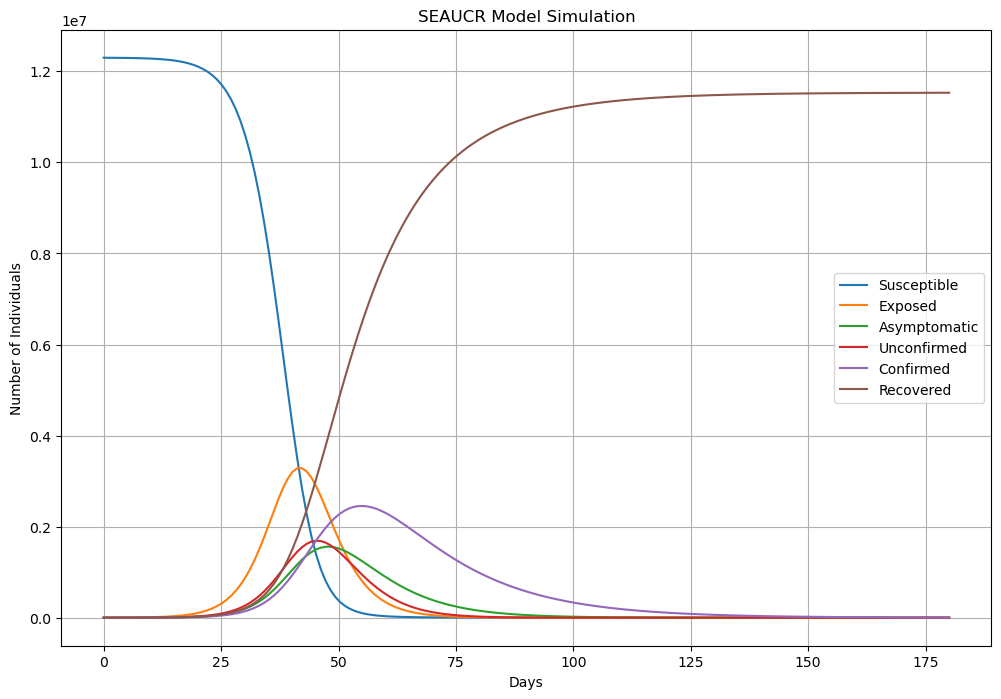

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seaucr_model(y, t, N, params):
    """
   Modelo SEAUCR
    
    Parameters:
        y : vector of state variables [S,E,A,U,C,R]
        t : time
        N : total population
        params : dictionary of parameters
        
    Returns:
        list of derivatives [dSdt, dEdt, dAdt, dUdt, dCdt, dRdt]
    """
    S, E, A, U, C, R = y
    
    # Parameters
    beta = params['beta']     # transmission rate
    alpha = params['alpha']   # incubation rate
    rho = params['rho']       # asymptomatic rate
    eta = params['eta']       # confirmation rate
    gamma_a = params['gamma_a']  # recovery rate (asymptomatic)
    gamma_u = params['gamma_u']  # recovery rate (unconfirmed)
    gamma_c = params['gamma_c']  # recovery rate (confirmed)
    delta = params['delta']    # disease-induced death rate
    
    # Force of infection (lambda)
    lambda_ = beta * (A + U + C) / N
    
    # Differential equations
    dSdt = -lambda_ * S
    dEdt = lambda_ * S - alpha * E
    dAdt = alpha * E * rho - gamma_a * A
    dUdt = alpha * E * (1 - rho) - (eta + gamma_u) * U
    dCdt = eta * U - (gamma_c + delta) * C
    dRdt = gamma_a * A + gamma_u * U + gamma_c * C
    
    return [dSdt, dEdt, dAdt, dUdt, dCdt, dRdt]

def simulate_seaucr(initial_conditions, params, t):
    """
    Run SEAUCR model simulation
    
    Parameters:
        initial_conditions : list [S0,E0,A0,U0,C0,R0]
        params : dictionary of parameters
        t : time vector
        
    Returns:
        array with solution for all compartments
    """
    N = sum(initial_conditions)
    solution = odeint(
        seaucr_model,
        initial_conditions,
        t,
        args=(N, params),
        rtol=1e-6,
        atol=1e-9
    )
    return solution

# Parameters (example values - should be calibrated to real data)
params = {
    'beta': 0.65,       # transmission rate
    'alpha': 1/5.1,    # incubation rate (1/incubation period)
    'rho': 0.35,        # fraction asymptomatic
    'eta': 1/7,        # confirmation rate
    'gamma_a': 1/10,   # recovery rate asymptomatic
    'gamma_u': 1/14,   # recovery rate unconfirmed
    'gamma_c': 1/21,   # recovery rate confirmed
    'delta': 0.008      # disease-induced death rate
}

# Initial conditions
N = 12.3e6
E0 = 1000    # Casos não detectados inicialmente
A0 = 500     # Assintomáticos
U0 = 300     # Sintomáticos não testados
C0 = 50      # Casos confirmados
R0 = 0
S0 = N - E0 - A0 - U0 - C0 - R0

initial_conditions = [S0, E0, A0, U0, C0, R0]

# Time vector (days)
t = np.linspace(0, 180, 180)

# Run simulation
solution = simulate_seaucr(initial_conditions, params, t)
# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t, solution[:, 0], label='Susceptible')
plt.plot(t, solution[:, 1], label='Exposed')
plt.plot(t, solution[:, 2], label='Asymptomatic')
plt.plot(t, solution[:, 3], label='Unconfirmed')
plt.plot(t, solution[:, 4], label='Confirmed')
plt.plot(t, solution[:, 5], label='Recovered')

plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('SEAUCR Model Simulation')
plt.legend()
plt.grid()
plt.show()
    